# Alumno: Gerardo de Miguel González

##  Práctica Regresión Lineal

### 1. Regresión Lineal

Se parte de los datos físico-químicos del embalse de Cuerda del Pozo (Soria) de los años 2014 y 2015.

**Tarea 1** 

Carga los datos y enfrenta los datos de Conductividad vs Salinidad de 2014.

In [2]:
#::GMG::Cargamos los datos
data <- read.csv(file = 'm1965-stats-ii-datos-practica-regresion.csv',header = TRUE,sep = ',')

In [3]:
#::GMG::Comprobamos que hemos cargado el conjunto de datos
head(data)

date,AVG.Temp.,AVG.Press.,AVG.Cond.,AVG.Salinity.,AVG.DO.,AVG.rawO2.,AVG.OxySat.,AVG.pH.,AVG.Redox.
01/01/2014 0:03,3.997746,9.621590,0.04066501,0.03042613,13.64697,557.8257,104.2490,8.132615,355.7024
02/01/2014 0:05,4.057667,3.944666,0.03989884,0.02982348,13.60542,557.2651,104.0947,8.105203,358.5334
03/01/2014 0:05,4.133612,3.991833,0.03766908,0.02809732,13.58907,558.5972,104.1756,8.045604,359.7074
04/01/2014 0:14,4.188685,3.945495,0.03458220,0.02574459,13.57724,559.5497,104.2334,7.972540,361.7077
05/01/2014 0:08,4.346172,9.391423,0.03129767,0.02324373,13.50923,561.2890,104.1373,7.902103,357.6429
06/01/2014 0:05,4.392661,9.359303,0.03112603,0.02310512,13.42513,559.0047,103.6140,7.892637,358.9344


In [4]:
#::GMG::La columna de de fechas (date) está en un formato no compatible con el tipo de fecha
#       DD/MM/YYYY adecuado para una indexación posterior que vamos a necesitar para la selección
#       de los parámetros AVG.Cond. (Conductividad) y AVG.Salinity. (Salinidad) de 2014 ...
#       Ajustamos las fechas
data$date <- as.Date(x = data$date, format='%d/%m/%Y %H:%M')

In [5]:
#::GMG::Comprobamos el resultado
head(data)

date,AVG.Temp.,AVG.Press.,AVG.Cond.,AVG.Salinity.,AVG.DO.,AVG.rawO2.,AVG.OxySat.,AVG.pH.,AVG.Redox.
2014-01-01,3.997746,9.621590,0.04066501,0.03042613,13.64697,557.8257,104.2490,8.132615,355.7024
2014-01-02,4.057667,3.944666,0.03989884,0.02982348,13.60542,557.2651,104.0947,8.105203,358.5334
2014-01-03,4.133612,3.991833,0.03766908,0.02809732,13.58907,558.5972,104.1756,8.045604,359.7074
2014-01-04,4.188685,3.945495,0.03458220,0.02574459,13.57724,559.5497,104.2334,7.972540,361.7077
2014-01-05,4.346172,9.391423,0.03129767,0.02324373,13.50923,561.2890,104.1373,7.902103,357.6429
2014-01-06,4.392661,9.359303,0.03112603,0.02310512,13.42513,559.0047,103.6140,7.892637,358.9344


In [6]:
#::GMG::Vamos a extraer los datos que necesitamos para la regresión: date, AVG.Cond. y AVG.Salinity.
myvars <- names(data) %in% c("date", "AVG.Cond.", "AVG.Salinity.")
data.processed <- data[myvars]
head(data.processed)

date,AVG.Cond.,AVG.Salinity.
2014-01-01,0.04066501,0.03042613
2014-01-02,0.03989884,0.02982348
2014-01-03,0.03766908,0.02809732
2014-01-04,0.03458220,0.02574459
2014-01-05,0.03129767,0.02324373
2014-01-06,0.03112603,0.02310512


In [7]:
#::GMG::Ahora vamos a separar los datos del año 2014
#       Vamos a usar los datos de 2014 para la regression
data.processed.2014 <- subset(
           x = data.processed, 
           data.processed$date >= as.Date('2014-01-01') & 
           data.processed$date <= as.Date('2014-12-31') 
           )
head(data.processed.2014)
paste(length(data.processed.2014$AVG.Cond.),
      length(data.processed.2014$AVG.Cond.))

#data.processed.2015 <- subset(
#           x = data.processed, 
#           data.processed$date >= as.Date('2015-01-01') & 
#           data.processed$date <= as.Date('2015-12-31') 
#           )
#tail(data.processed.2015)

#length(na.omit(data.processed.2014$AVG.Cond.))
#length(na.omit(data.processed.2015$AVG.Cond.))

date,AVG.Cond.,AVG.Salinity.
2014-01-01,0.04066501,0.03042613
2014-01-02,0.03989884,0.02982348
2014-01-03,0.03766908,0.02809732
2014-01-04,0.03458220,0.02574459
2014-01-05,0.03129767,0.02324373
2014-01-06,0.03112603,0.02310512


[1] "365 365"

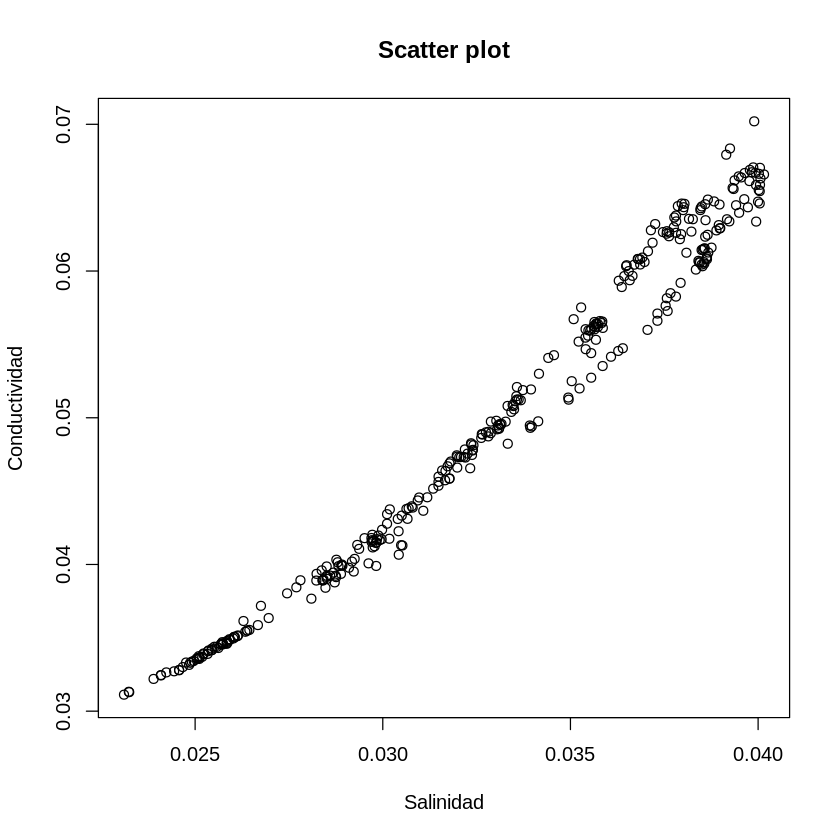

In [8]:
#::GMG::Dibujamos la correlación entre salinidad y conductividad (scatter plot),  
#       que nos indica que se puede modelar una relación lineal entre ellas
plot(data.processed.2014$AVG.Salinity.,
     data.processed.2014$AVG.Cond.,
     main='Scatter plot',
     xlab='Salinidad',
     ylab='Conductividad')

**Tarea 2**

Construye una función que reciba los vectores “x” e “y” y calcule los valores de los
coeficientes que minimizan la función de coste.

In [10]:
#::GMG::Calculamos la función que resulve los alphas
alpha <- function(x,y) {
    X <- cbind(rep(1,length(x)),x)
    Y <- as.matrix(y)
    #Y <- matrix(y,nrow = length(y))
    return (solve(t(X) %*% X) %*% t(X) %*% Y)
}

In [11]:
#::GMG::Ahora seleccionamos y limpiamos nuestros vectores de salinidad y conductividad.
#       Hay que limpiar los NaNs
x.2014 <- na.omit(data.processed.2014$AVG.Salinity.)
y.2014 <- na.omit(data.processed.2014$AVG.Cond.)

#::GMG::Tras la limpieza nos quedan menos de 365 muestras
paste(length(x.2014), length(y.2014))

#x.2015 <- na.omit(data.processed.2015$AVG.Salinity.)
#y.2015 <- na.omit(data.processed.2015$AVG.Cond.)
#length(x.2015)

[1] "339 339"

In [18]:
#::GMG::los coeficientes que minimizan la función de coste son (alpha.0, alpha.1)
coeff.2014 <- alpha(x.2014,y.2014)
#print(coeff.2014)
print(as.vector(coeff.2014))

[1] -0.02392126  2.24129710


**Tarea 3**

Calcula los coeficientes de forma analítica y compara el resultado con los valores obtenidos
anteriormente.

In [20]:
alpha.1 <- sum((x.2014 - mean(x.2014))*(y.2014 - mean(y.2014))) / sum((x.2014 - mean(x.2014))^2)
alpha.0 <- mean(y.2014) - alpha.1*mean(x.2014)
coeff.2014.analytic <- c(alpha.0, alpha.1)
print(as.vector(coeff.2014.analytic))

[1] -0.02392126  2.24129710


**Tarea 4**

Compara ambos resultados con el obtenido mediante la función “lm” implementada en R.

In [28]:
model <- lm(y.2014 ~ x.2014)
#model$coefficients
print(c(model$coefficients['(Intercept)'],c(model$coefficients['x.2014'])))

(Intercept)      x.2014 
-0.02392126  2.24129710 


### 2. Regresión no lineal